In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv("matches.csv", index_col=0)

In [3]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal


In [4]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [5]:
matches = matches.drop(columns=['notes', 'season'])

In [6]:
matches.corr(numeric_only = True)

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt
gf,1.000000,-0.223054,0.598186,-0.217224,2.030787e-01,3.648648e-02,0.333060,0.602275,-0.100459,0.013998,0.293747,0.301429
ga,-0.223054,1.000000,-0.217224,0.598186,-2.030787e-01,3.648648e-02,-0.225806,-0.232304,0.011336,-0.030446,-0.031277,-0.037863
xg,0.598186,-0.217224,1.000000,-0.279437,3.561801e-01,1.143861e-01,0.697060,0.657554,-0.208300,0.082342,0.405279,0.465403
xga,-0.217224,0.598186,-0.279437,1.000000,-3.561801e-01,1.143861e-01,-0.343680,-0.251409,0.000244,-0.054384,-0.069245,-0.080501
poss,0.203079,-0.203079,0.356180,-0.356180,1.000000e+00,-7.657711e-16,0.535154,0.363157,-0.000153,0.078683,0.098952,0.115286
attendance,0.036486,0.036486,0.114386,0.114386,-7.657711e-16,1.000000e+00,0.081866,0.075726,0.000006,0.001923,0.048777,0.062054
sh,0.333060,-0.225806,0.697060,-0.343680,5.351543e-01,8.186595e-02,1.000000,0.701601,-0.008628,0.189821,0.083103,0.139380
sot,0.602275,-0.232304,0.657554,-0.251409,3.631571e-01,7.572576e-02,0.701601,1.000000,-0.043539,0.106630,0.098629,0.152171
dist,-0.100459,0.011336,-0.208300,0.000244,-1.529119e-04,5.708767e-06,-0.008628,-0.043539,1.000000,0.205510,0.133679,0.138082
fk,0.013998,-0.030446,0.082342,-0.054384,7.868253e-02,1.923445e-03,0.189821,0.106630,0.205510,1.000000,-0.035087,-0.015205


<Axes: >

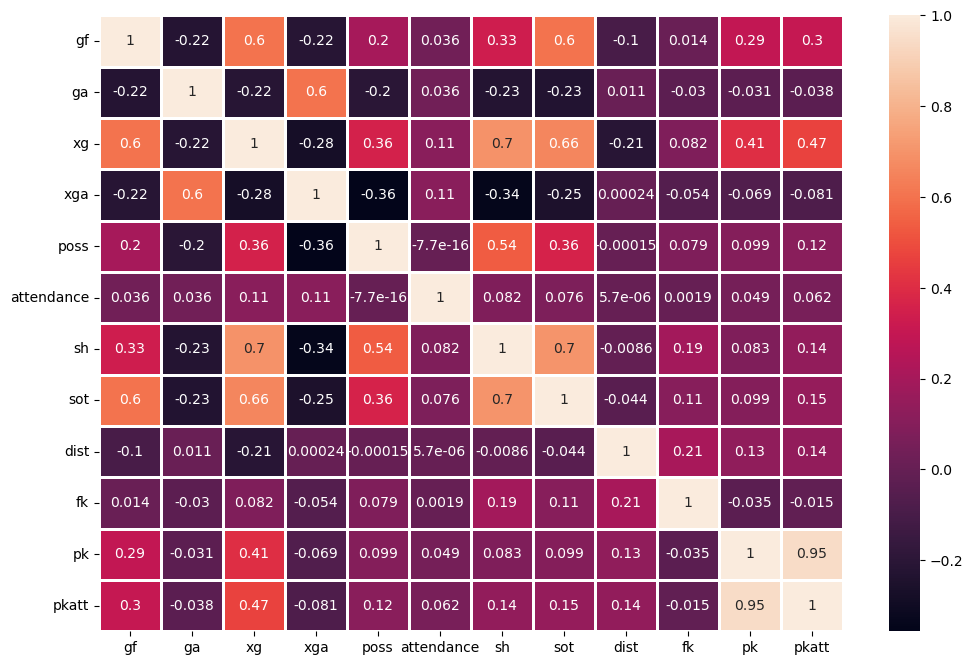

In [7]:
plt.figure(figsize = (12,8))
sns.heatmap(matches.corr(numeric_only = True), linecolor = 'white', linewidths = 1, annot=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.items():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

matches_dummies = matches.copy()

matches_dummies = MultiColumnLabelEncoder(columns = ['venue','result','formation']).fit_transform(matches_dummies)
#MultiColumnLabelEncoder().fit_transform(matches_dummies).head()
matches_dummies.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,1,2,2.0,1.0,Nott'ham Forest,...,12,Michael Oliver,Match Report,15.0,7.0,19.1,0.0,0,0,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,0,2,1.0,0.0,Crystal Palace,...,12,David Coote,Match Report,13.0,2.0,16.4,0.0,1,1,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,1,0,2.0,2.0,Fulham,...,12,Paul Tierney,Match Report,18.0,9.0,13.8,0.0,1,1,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,1,2,3.0,1.0,Manchester Utd,...,12,Anthony Taylor,Match Report,17.0,5.0,15.0,0.0,0,0,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,0,2,1.0,0.0,Everton,...,12,Simon Hooper,Match Report,13.0,4.0,17.4,0.0,0,0,Arsenal


<Axes: >

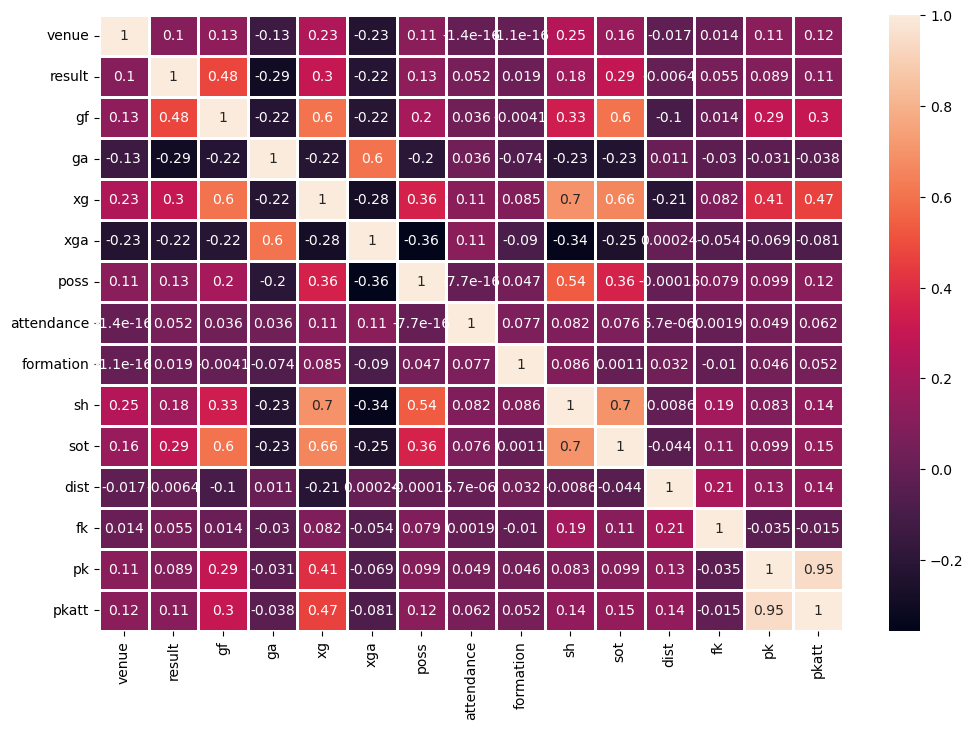

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(matches_dummies.corr(numeric_only = True), linecolor = 'white', linewidths = 1, annot=True)